# Analysis of APK Size Distribution (2014-2022)

This notebook analyzes the size distribution of Android APKs from the Androzoo dataset across different years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [2]:
# Read the metadata file
meta = pd.read_csv('/projects/hchen5_proj/data/latest.csv')

# Convert dex_date to datetime
meta['dex_date'] = pd.to_datetime(meta['dex_date'])

# Filter for benign apps (vt_detection = 0) and specific markets
markets = ['play.google.com', 'anzhi', 'appchina']
pattern = '|'.join([f"(meta.markets.str.contains('{m}'))" for m in markets])
benign_apps = meta[
    (meta.vt_detection == 0) & 
    eval(pattern)
]

benign_apps['year'] = benign_apps['dex_date'].dt.year

benign_apps = benign_apps[
    (benign_apps['year'] >= 2014) & 
    (benign_apps['year'] <= 2022)
]

print(f"Total number of benign apps between 2014-2022: {len(benign_apps)}")

/tmp/ipykernel_2108758/1063447180.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benign_apps['year'] = benign_apps['dex_date'].dt.year


Total number of benign apps between 2014-2022: 4181077


In [3]:
# Calculate basic statistics for each year
yearly_stats = benign_apps.groupby('year').agg({
    'apk_size': ['count', 'mean', 'median', 'std', 'min', 'max']
}).round(2)

# Convert sizes to MB for better readability
for col in ['mean', 'median', 'std', 'min', 'max']:
    yearly_stats[('apk_size', col)] = yearly_stats[('apk_size', col)] / (1024 * 1024)

print("Yearly Statistics (sizes in MB):")
display(yearly_stats)

Yearly Statistics (sizes in MB):


apk_size                                                       
        count       mean     median        std       min         max
year                                                                
2014  1136858   6.991265   3.852444   9.012872  0.004077  594.306170
2015   615654   9.830778   5.646608  11.677338  0.003266  646.818883
2016  1137740  11.929469   7.165492  12.834310  0.003222  593.708921
2017   311243  18.798136  11.840133  21.915969  0.005291  644.389579
2018   364734  24.398432  16.970520  25.047621  0.007336  646.655862
2019   239461  30.116346  22.610183  29.054535  0.008107  643.622025
2020   208237  30.159142  21.085213  28.290394  0.013385  647.045021
2021   122332  38.928494  30.773808  32.356431  0.005418  648.842669
2022    44818  52.298051  44.177773  39.473646  0.035736  632.750927

/tmp/ipykernel_2108758/1434889530.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.1f} MB'.format(x/(1024*1024)) for x in current_values])


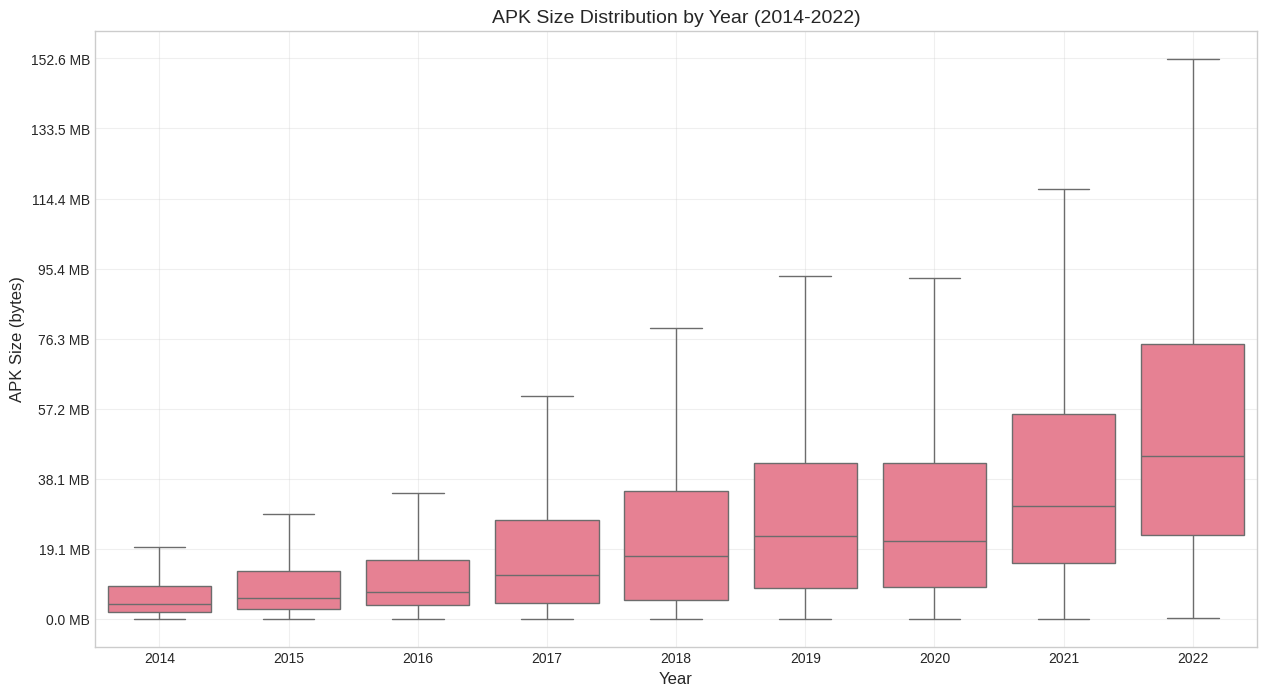

In [4]:
# Create box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=benign_apps, x='year', y='apk_size', showfliers=False)
plt.title('APK Size Distribution by Year (2014-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('APK Size (bytes)', fontsize=12)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f} MB'.format(x/(1024*1024)) for x in current_values])

plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipykernel_2108758/2666968092.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.1f} MB'.format(x/(1024*1024)) for x in current_values])


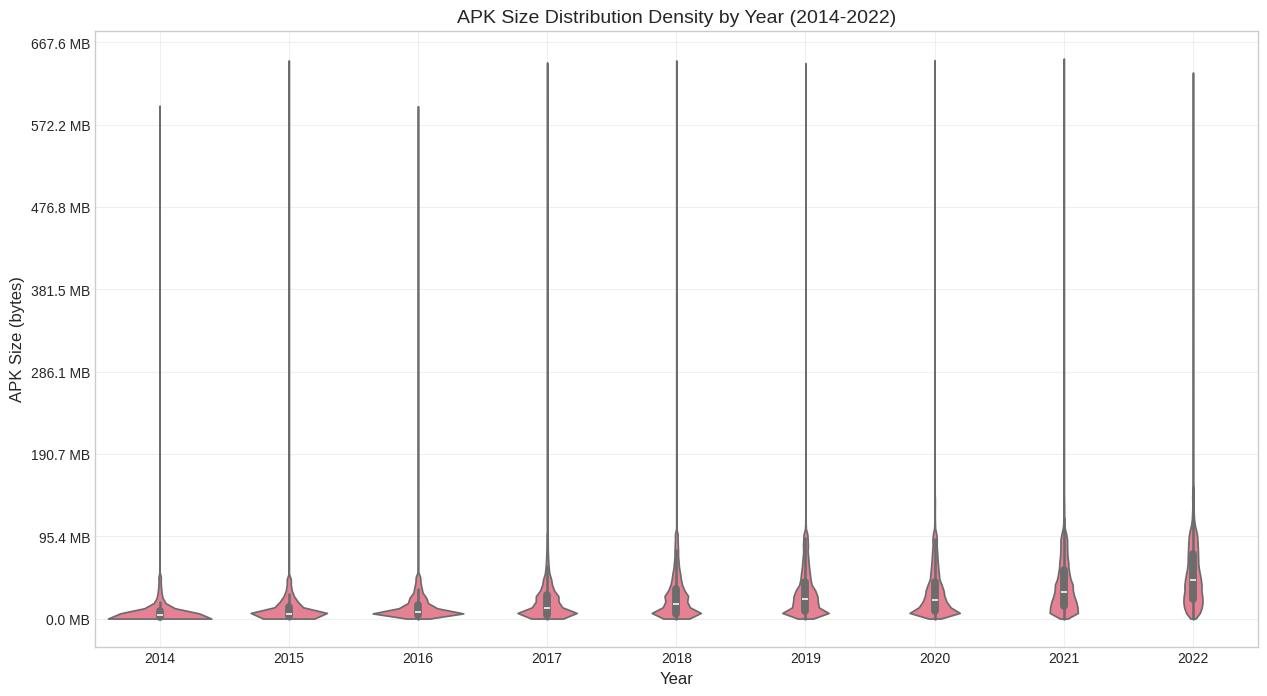

In [5]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=benign_apps, x='year', y='apk_size', cut=0)
plt.title('APK Size Distribution Density by Year (2014-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('APK Size (bytes)', fontsize=12)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f} MB'.format(x/(1024*1024)) for x in current_values])

plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

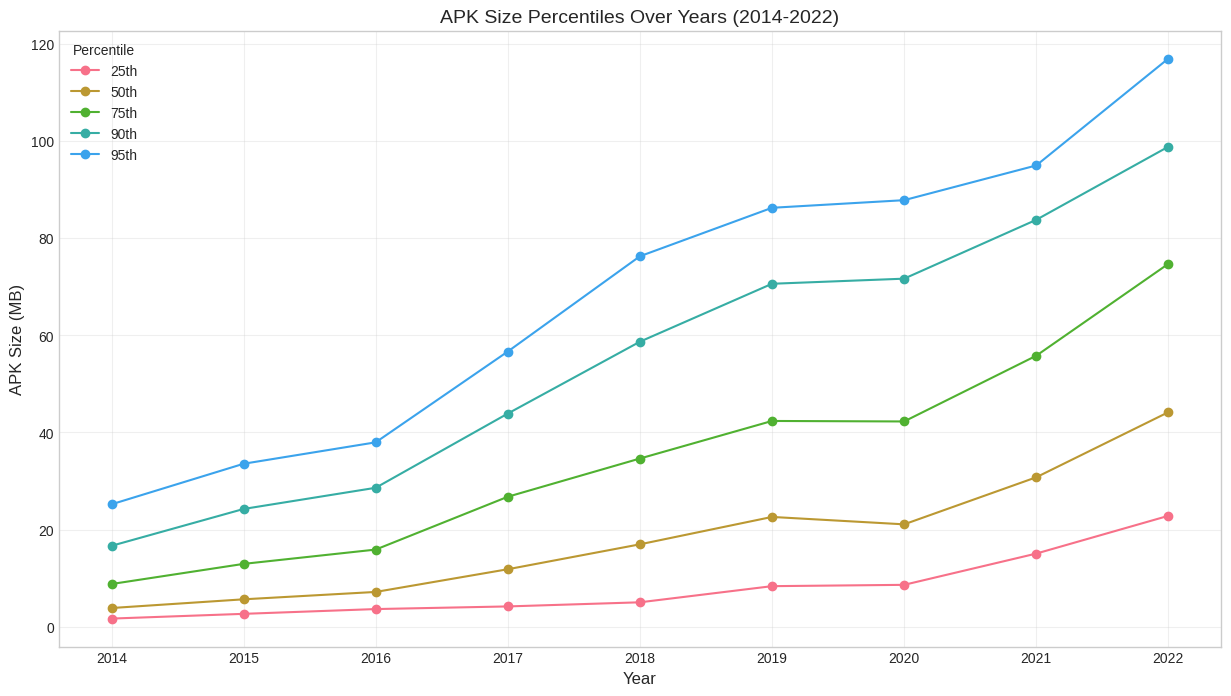


Percentile values (MB) by year:


,2014,2015,2016,2017,2018,2019,2020,2021,2022
25th,1.68,2.65,3.64,4.18,5.03,8.36,8.63,15.06,22.84
50th,3.85,5.65,7.17,11.84,16.97,22.61,21.09,30.77,44.18
75th,8.80,12.94,15.89,26.77,34.64,42.37,42.27,55.80,74.73
90th,16.66,24.25,28.61,43.90,58.70,70.62,71.67,83.79,98.85
95th,25.21,33.56,37.97,56.68,76.29,86.27,87.84,94.99,117.00


In [6]:
percentiles = [25, 50, 75, 90, 95]
yearly_percentiles = pd.DataFrame()

for year in sorted(benign_apps['year'].unique()):
    year_data = benign_apps[benign_apps['year'] == year]['apk_size']
    percentile_values = np.percentile(year_data, percentiles)
    yearly_percentiles[year] = percentile_values / (1024 * 1024)  # Convert to MB

yearly_percentiles.index = [f'{p}th' for p in percentiles]

plt.figure(figsize=(15, 8))
for percentile in yearly_percentiles.index:
    plt.plot(yearly_percentiles.columns, yearly_percentiles.loc[percentile], 
             marker='o', label=percentile)

plt.title('APK Size Percentiles Over Years (2014-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('APK Size (MB)', fontsize=12)
plt.legend(title='Percentile')
plt.grid(True, alpha=0.3)
plt.show()

print("\nPercentile values (MB) by year:")
display(yearly_percentiles.round(2))

## Benign APK Counts by Year

In [1]:
%%bash

for year in {2012..2022}; do
  dir="/projects/hchen5_proj/data/Androzoo/Benign/$year"
  if [ -d "$dir" ]; then # Check if directory exists
    size=$(du -sh "$dir" | awk '{print $1}')
    count=$(find "$dir" -type f -name '*.apk' | wc -l) 
    echo "$year  →  $size  |  $count APK files"
  else
    echo "$year  →  Directory not found"
  fi
done

2012  →  212G  |  50400 APK files
2013  →  308G  |  50400 APK files
2014  →  378G  |  50382 APK files
2015  →  525G  |  50300 APK files
2016  →  619G  |  50030 APK files
2017  →  989G  |  50062 APK files
2018  →  1.2T  |  46251 APK files
2019  →  1.5T  |  47935 APK files
2020  →  1.5T  |  47843 APK files
2021  →  2.0T  |  47960 APK files
2022  →  2.4T  |  44812 APK files


## Malicious APK Counts by Year

In [1]:
%%bash

for year in {2012..2024}; do
  dir="/projects/hchen5_proj/data/Androzoo/Malware_4/$year"
  if [ -d "$dir" ]; then # Check if directory exists
    size=$(du -sh "$dir" | awk '{print $1}')
    count=$(find "$dir" -type f -name '*.apk' | wc -l) `1`
    echo "$year  →  $size  |  $count APK files"
  else
    echo "$year  →  Directory not found"
  fi
done

2012  →  27G  |  5200 APK files
2013  →  54G  |  5200 APK files
2014  →  66G  |  5200 APK files
2015  →  89G  |  5200 APK files
2016  →  97G  |  5200 APK files
2017  →  83G  |  5200 APK files
2018  →  122G  |  5200 APK files
2019  →  165G  |  5200 APK files
2020  →  198G  |  5200 APK files
2021  →  247G  |  5200 APK files
2022  →  293G  |  5200 APK files
2023  →  Directory not found
2024  →  Directory not found
